# MTH9879 Homework 9

Assigned: April 25, 2017.
Due: May 9, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.


### R version 3.3.2 (2016-10-31) (ubuntu)

### 1. (20 points)
Following Almgren and Chriss,  assume that the stock price $S_t$ evolves as

$$
dS_t = \sigma\,dZ_t
$$

and the price $\tilde S_t$ at which we transact is given by

$$
\tilde S_t = S_t - \eta\,v_t
$$

where $v_t:=-{\dot x}_t$ is the rate of trading with $x_0 = X$ and $x_T = 0$.

In the lecture notes, we showed that with a risk term that penalizes average VaR instead of variance, the risk-adjusted cost of trading associated with a given price path $\{S_t\}$ is given by

$$
C = \int_0^T\,(S_t - \eta\,v_t) \,dx_t + \lambda\,\sigma\,\int_0^T\,x_t\,dt
$$

for some price of risk $\lambda$. We want to find a (possibly state-dependent) control $v_t$ that minimizes the expected cost $\cC=\E[C]$.

(a) Apply the technique of integration by parts to simplify the term $\int_0^T S_t dx_t$. Does the optimal strategy depend on the stock price $S_t$?  Why not?  Write down the HJB equation for the resulting problem.

#### <font color=blue> Solution (a)</font>

Apply the technique of integration by parts to $\int_0^T S_t dx_t$, we can get

$$
\left.\int_0^T S_t\,dx_t =  S_t\,x_t \right\vert_0^T - \int_0^T x_t\,dS_t = -XS -\int_0^T\sigma x_tdZ_t,
$$

Thus    
$$
\E\left[ \int_0^T S_t\,dx_t \right] = -XS
$$

From lecture we know the exptected cost $\cC$ is

$$
\mathbb{E}[\cC]
= \mathbb{E}_{v_t\in\mathcal G} \left\{-XS + \E\left[\int_0^T\,\eta\,v_t^2 dt + \lambda\,\sigma\,\int_0^T\,x_t\,dt\right]\right\}
$$


The value functiion $C$ is 

$$
C(t,x) = \min_{v\in\mathcal G[t,T]} \left\{\lambda\,\sigma\,\int_0^T\,x_t\,dt + \int_0^T\,\eta\,v_t^2 d t \right\}
$$

The running cost $h(t,x,v) = \lambda\,\sigma\, x_t + \eta\,v_t^2$

The infinitesimal generator is
$$
\mathcal L^{(v)} C(t,x) = (\frac{\sigma^2}2 \p_x^2 + \mu \p_x)C(t,x) = -v\,C_x
$$
The HJB equation reads

$$
\frac{\partial C}{\partial t} + \lambda\,\sigma\,x + \min_{v \in \mathcal{G}}\left\{-v\,C_x + \eta\,v^2\right\}=0.
$$

(b) Solve the first order condition to find the optimal trading rate $v^\star$.    

#### <font color=blue> Solution (b)</font>

From (a), we know $\min_{v \in \mathcal{G}}\left\{-v\,C_x + \eta\,v^2\right\}$.

Obviously we can derive that $v^\star = \frac{C_x}{2\eta}$.

(c) Substitute $v^\star$ back into the HJB equation to show that the value function $\cC$ must satisfy
$$
\cC_t = \frac{\cC_x^2}{4\,\eta\,} - \lambda \sigma x.
$$


#### <font color=blue> Solution (c)</font>

Substitute $v^\star$ back into the HJB equation we get

$$
\frac{\partial C}{\partial t} + \lambda\,\sigma\,x - \frac{C_x^2}{4\eta}=0.
$$

Thus

$$
\cC_t = \frac{\cC_x^2}{4\,\eta\,} - \lambda \sigma x.
$$

(d) With the terminal condition, 

$$\lim_{t\uparrow T}\cC(t,x) = \begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}
\end{cases}$$

solve the HJB equaiton with the ansatz $\cC(t,x) = \eta\,\left[a(t)\,x^2 + b(t)\,x + c(t)\right]$. Verify that the optimal trading rate is given by

$$
v^\star = \frac{x}{T-t} + \frac{1}{4}\, \kappa \, (T-t)
$$

with 

$$
\kappa = \frac{\lambda\,\sigma}{\eta}.
$$

#### <font color=blue> Solution (d) </font>

Since $C(t,x) = a(t)x^2 + b(t)x + c(t)$

we can get

$$
a' \,x^2 + b'\,x + c' - \frac{(2ax + b)^2}{4\eta} + \lambda\sigma x = 0
$$

comparing the coefficient
\begin{eqnarray*}
x^2 &:& a' - \frac{a^2}{\eta} = 0, \\
x &:& b' - \frac{ab}{\eta} + \lambda\sigma = 0, \\
1 &:& c' - \frac{b^2}{4\eta} = 0.
\end{eqnarray*}

So that:
\begin{eqnarray*}
&& a(t) = \frac{\eta}{T-t}, \\
&& b(t) = \frac{\lambda \sigma}{2} (T-t), \\
&& c(t) = \frac{\lambda^2 \sigma^2}{48\eta} (t-T)^3.
\end{eqnarray*}

Using the boundary condition, we obtain the solution to the system of ODEs as
\begin{eqnarray*}
&& a(t) = \frac{\eta}{T-t}, \\
&& b(t) = \frac{\lambda \sigma}{2} (T-t), \\
&& c(t) = \frac{\lambda^2 \sigma^2}{48\eta} (t-T)^3.
\end{eqnarray*}

$$
v^\star = \frac{C_x}{2\eta} = \frac{2ax + b}{2\eta}
$$

Pluge in the result:
$$
v^\star = \frac{x}{T-t} + \frac{1}{4}\, \kappa \, (T-t)
$$

So, we have,

$$\begin{align}
E[C] &= \lambda\,\sigma\,\int_0^T\,x_t\,dt + \int_0^T\,\eta\,v_t^2 d t  \\
&= X(\lambda \sigma + \frac{4\eta X}{T^2}) \int_0^T (1 - \frac{t}{T})^2 d t \\
&= \frac{XT}{3}(\lambda \sigma + \frac{4\eta X}{T^2})
\end{align}
$$

(e) Define the characteristic time $T^\star$ as

$$
T^\star=\sqrt{\frac{4\,X}{\kappa}}=\sqrt{\frac{4\,\eta\,X}{\lambda\,\sigma}}.
$$


Verify that the optimal trading strategy with liquidation horizon set to the characteristic time $T^\star$ is given by

$$
\begin{eqnarray*}
x_t&=&X\,\left(1-\frac{t}{T}\right)^2.
\end{eqnarray*}
$$

#### <font color=blue> Solution (e) </font>

From the previous problem we know
$$
v^\star = \frac{x}{T-t} - \frac{1}{4}\, \kappa \, (T-t)
$$
which means
$$
\frac{dx}{dt} = \frac{x}{T-t} - \frac{1}{4}\, \kappa \, (T-t)
$$

Solve this ODE, we can get
$$
x = c_1 (t-T) + \frac{\lambda \sigma t(t-T)}{4 \eta}
$$
$x(0) = X$ so that
$$c_1 = \frac{X}{-T}$$

The solution is 
$$
\begin{align}
x(t) &= \frac{X}{-T}(t-T) + \frac{xt}{(T^\star)^2} (t-T) \\
&= \left( \frac{X}{T} - \frac{XT}{(T^\star)^2}t\right)\left(1-\frac{t}{T}\right)
\end{align}
$$

so that
$$
x_t = X\,\left(1-\frac{t}{T}\right)^2
$$

## ABM and GBM

### Download MSFT data

In [1]:
library(highfrequency)
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
library(repr)
options(repr.plot.height=5)

### 2. (8 points)

Recall from the lecture slides that with time-averaged VaR as the risk penalty, and when the liquidation time $T$ is chosen to be the characteristic time, the optimal trading rate under ABM becomes

$$
v^A(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\left(1-\frac t T\right)
$$

and the optimal trading rate under GBM becomes

$$
v^G(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\frac{S_t}{S_0}\,\left(1-\frac t T\right).
$$

(a) The *msft.bats* dataset from *MSFT130311.rData* contains all trades on the BATS exchange on 11-Mar-2013.  One trading days has 390 minutes.  Sample the  *msft.bats* dataset evenly, roughly every minute of volume time.  Superimpose plots of the optimal strategy under ABM and GBM assuming liquidation takes place over one trading day.

#### <font color=blue> Solution (a) </font>


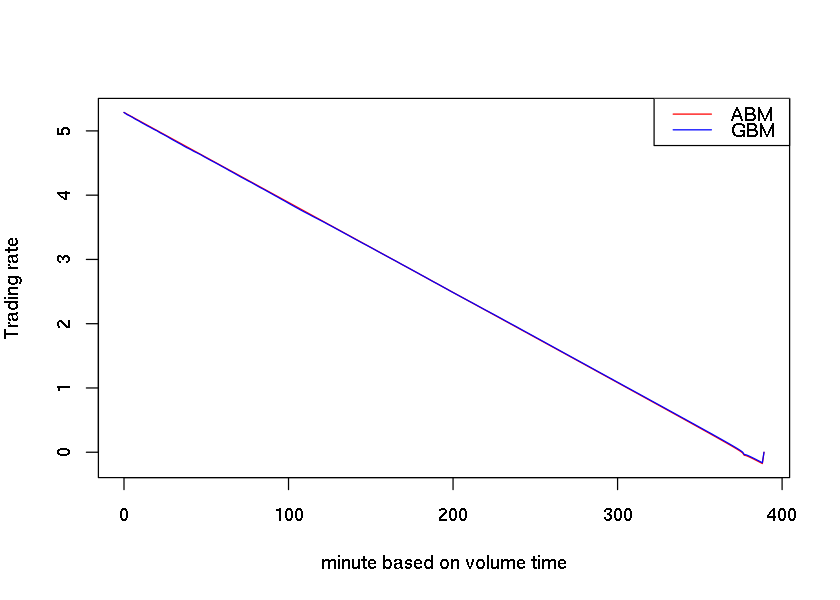

In [3]:
# Get access to the data
data <- msft130311.bats

# Implement the optimal trading rate functions under two assumptions.
Cal_V_A <- function(xt, t){xt/(T-t) + X/T*(1 - t/T)}
Cal_V_G <- function(xt, t, St){xt/(T-t) + X/T * St/S0 * (1 - t/T)}

# Time steps to sample
Steps <- 390

# Initial shares to liquidate
X <- 1000

# Price of risk
lambda <- 0.001

# Compute the total volume
volume <- data$signed.shares
vol_minute <- round(sum(abs(volume))/Steps)

# Sample the share price based on the volume time
S_t <- data$trade.price[!duplicated(floor(cumsum(abs(volume))/vol_minute))]

# Initial price when I begin to liquidate
S0 <- S_t[1]

# Characteristic time
T <- sqrt(4*X/(lambda * S0))
#T <- Steps

# Position sizes
X_A <- rep(0, Steps)
X_G <- rep(0, Steps)
X_A[1] <- X
X_G[1] <- X

# trading rate at each time step
V_A <- rep(0, Steps)
V_G <- rep(0, Steps)

for(i in 1:(Steps-1))
{
    V_A[i] <- Cal_V_A(X_A[i], i)
    X_A[i+1] <- X_A[i] - V_A[i]
    
    V_G[i] <- Cal_V_G(X_G[i], i, S_t[i])
    X_G[i+1] <- X_G[i] - V_G[i]
}

t <- seq(0,Steps - 1)

plot(t,V_A,col="red",type="l", ylab = expression("Trading rate"), xlab = expression("minute based on volume time"))

lines(t,V_G,main="Optimal trading rate under two assumptions", col="blue", type="l")

legend("topright", c("ABM","GBM"),
           lty = c(1,1), col=c("red","blue"))

(b) Denote the corresponding position sizes by $x^A(t)$ and $x^G(t)$ respectively.  What is the maximum deviation of the two position sizes as a percentage of the initial position $X$?  How significant is this deviation?

#### <font color=blue> Solution (b) </font>


In [4]:
max_diff <- max(abs(X_A - X_G))
deviation <- max_diff / X
cat(paste("the maximum deviation of the two position sizes as a percentage of the initial position X =",deviation*100, "%"))

the maximum deviation of the two position sizes as a percentage of the initial position X = 0.122978884800318 %

Appearantly, 0.123% is very insignificant.

## Kratz and Schöneborn with time-averaged VaR risk charge

### 3. (12 points)

(a) Repeat the computation of the optimal strategy from the lecture notes with time-averaged VaR

$$
\lambda\,\sigma\,\int_0^T\,x_t\,dt
$$

as the risk term (rather than the quadratic variation $\lambda\,\sigma^2\,\int_0^T\,x_t^2\,dt$).  Show that the optimal position

$$
x^\star(t)=\left(X-\frac{A\, T}{\theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t)
$$
and deduce the optimal trading rate $v^\star(t)$.

#### <font color=blue> Solution (a) </font>

The expected cost of liquidation with time-averaged VaR risk penalty is given by

$$
C(t) = \eta \mathbb{E}\left[ \int_t^T\,\dot x_u^2 + \kappa x_u\,du \right]
$$
where $\kappa := \lambda\sigma / \eta$

$$
dC^C = \eta (v_t^2 + \kappa x_t)dt - v_t C_x dt
$$

Contribution from dark pool execution (if it occurs) is<br>
$$
dC^D = C(x_t - y_t) - C(x)
$$


Thus the corresponding HJB equation is

$$
C_t + \eta\kappa x_t + \min_{v,y \in \mathcal{G}} \left\{ -vC_x +\eta v^2 + \theta \left[C(x_t-y_t)-C(x_t)\right] \right\} = 0
$$

The y that minimizes $[C(x_t-y)-C(x_t)]$ is $y^\star=x_t$ and  $v^\star =\frac{C_x}{2\eta}$ 

$$
C_t+\eta\kappa x_t-\frac{C_x^2}{4\eta}-\theta C=0
$$

Since the terminal condition
$$\lim_{t\uparrow T} C(t,x) = \begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}
\end{cases}$$

Again we use the ansatz $C(t,x) = a(t)x^2 + b(t)x + c(t)$, the pde becomes

$$
(a' \,x^2 + b'\,x + c') + \lambda\sigma x - \frac{(2ax + b)^2}{4\eta} - \theta (ax^2 + bx + c) = 0
$$

so that
\begin{eqnarray*}
x^2 &:& a' - \frac{a^2}{\eta} - \theta a= 0, \\
x &:& b' - \frac{ab}{\eta} + \lambda\sigma - \theta b = 0, \\
1 &:& c' - \frac{b^2}{4\eta} - \theta c= 0.
\end{eqnarray*}

The result is:
\begin{eqnarray*}
&& a(t) = -\frac{\theta\eta}{2} \left(1-\mbox{coth}(\frac{\theta}{2}(T-t))\right), \\
&& b(t) = \frac{2A\eta}{\theta} + A\eta (T-t) \left(1-\mbox{coth}(\frac{\theta}{2}(T-t))\right), \\
\end{eqnarray*}

Thus

$$
\begin{align}
v^\star 
&= \frac{C_x}{2 \eta} \\
&= \frac{2ax + b}{2 \eta} \\
&= \frac{1}{2\eta}\left[ -2\frac{\theta\eta}{2} \left(1-\mbox{coth}(\frac{\theta}{2}(T-t))\right)\cdot x + \frac{2A\eta}{\theta} + A\eta (T-t) \left(1-\mbox{coth}(\frac{\theta}{2}(T-t))\right) \right]
\end{align}
$$

Since $v^\star = -\frac{dx}{dt}$ and $x(0) = X$ so that 
$$
x(t) = \frac{A}{\theta}(T-t) + \left(X-\frac{AT}{\theta}\right) \frac{1-e^{-\theta(T-t)}}{1-e^{-\theta T}}
$$


(b) By Taylor-expanding the solution around $\theta=0$, show that we retrieve the solution derived in the slides with no dark pool

$$
x^\star(t)=\left(X-\frac{A \, T}{2}\,t\right)\,\left(1-\frac{t}{T}\right) .
$$

in the limit $\theta \to 0$.

#### <font color=blue> Solution (b) </font>

From the previous problem
$$
\begin{align}
x^\star(t) &= \left(X-\frac{A\, T}{\theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t) \\
&= X \frac{1-e^{-\theta(T-t)}}{1-e^{-\theta T}} - A \left(\frac{T-t}{\theta} - \frac{T(1-e^{-\theta(T-t)})}{\theta(1-e^{-\theta T})}\right)
\end{align}
$$

for the first part,
$$
\begin{align}
\lim_{\theta \to 0} \frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}
&= \lim_{\theta \to 0} \frac{(T-t)e^{-\theta\,(T-t)} }{Te^{-\theta\,T }}\\
&= \lim_{\theta \to 0} e^{\theta t} - \frac{t}{T} e^{-\theta (T-t) + \theta T} \\
&= 1 - \frac{t}{T}
\end{align}
$$

for the second part,
$$
\begin{align}
\lim_{\theta \to 0} A \left(\frac{T-t}{\theta} - \frac{T(1-e^{-\theta(T-t)})}{\theta(1-e^{-\theta T})} \right) 
&= \lim_{\theta \to 0} A\,\left( \frac{T\,(e^{-\theta(T-t)}-e^{-\theta T}) - t(1-e^{-\theta T})}{\theta (1-e^{-\theta T})}\right) \\
&=\lim_{\theta \to 0} A\,\left( \frac{T\,(-(T-t)e^{-\theta(T-t)}+Te^{-\theta T}) - t(Te^{-\theta T})}{1-e^{-\theta T}+\theta T (e^{-\theta T})}\right) \\
&=\lim_{\theta \to 0} A\,\left( \frac{T\,((T-t)^2e^{-\theta(T-t)}-T^2e^{-\theta T}) + t T^2 e^{-\theta T}}{2Te^{-\theta T}-\theta T^2 e^{-\theta T}}\right) \\
&= A\, \left(\frac{t^2-tT}{2}\right) \\
&= \frac{At}{2} (t-T)
\end{align}
$$

Combining these two, we get
$$
x^\star(t)=\left(X-\frac{A \, T}{2}\,t\right)\,\left(1-\frac{t}{T}\right)
$$